# FLOOD PREDICTION MODEL

In [18]:
#Import some basic libraries
import numpy as np
import pandas as pd

# Data Insight

In [19]:
#Read the data present in dataset
data = pd.read_csv('rainfall.csv')
#Using data.head() we can see the top 5 rows of the dataset
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [20]:
#Now we will cheak if any colomns is left empty
data.apply(lambda x:sum(x.isnull()), axis=0)

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [21]:
#We want the data in numbers, therefore we will replace the yes/no in floods coloumn by 1/0
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [22]:
#Let's see how are data looks like now
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [23]:
print('Rows     :',data.shape[0])
print('Columns  :',data.shape[1])
print('\nFeatures :\n     :',data.columns.tolist())
print('\nMissing values    :',data.isnull().values.sum())
print('\nUnique values :  \n',data.nunique())

Rows     : 118
Columns  : 16

Features :
     : ['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL', 'FLOODS']

Missing values    : 0

Unique values :  
 SUBDIVISION           2
YEAR                118
JAN                  87
FEB                  96
MAR                 108
APR                 116
MAY                 118
JUN                 116
JUL                 116
AUG                 116
SEP                 117
OCT                 116
NOV                 115
DEC                 106
 ANNUAL RAINFALL    118
FLOODS                2
dtype: int64


In [24]:
#Now let's seperate the data which we are gonna use for prediction
x = data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [25]:
subdivs = data['SUBDIVISION'].unique()
num_of_subdivs = subdivs.size
print('Total # of Subdivs: ' + str(num_of_subdivs))
subdivs

Total # of Subdivs: 2


array(['KERALA', 'KERALA '], dtype=object)

In [26]:
#Now seperate the flood label from the dataset
y = data.iloc[:, -1]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64

array([[<AxesSubplot:title={'center':'JAN'}>,
        <AxesSubplot:title={'center':'FEB'}>,
        <AxesSubplot:title={'center':'MAR'}>],
       [<AxesSubplot:title={'center':'APR'}>,
        <AxesSubplot:title={'center':'MAY'}>,
        <AxesSubplot:title={'center':'JUN'}>],
       [<AxesSubplot:title={'center':'JUL'}>,
        <AxesSubplot:title={'center':'AUG'}>,
        <AxesSubplot:title={'center':'SEP'}>],
       [<AxesSubplot:title={'center':'OCT'}>,
        <AxesSubplot:title={'center':'NOV'}>,
        <AxesSubplot:title={'center':'DEC'}>]], dtype=object)

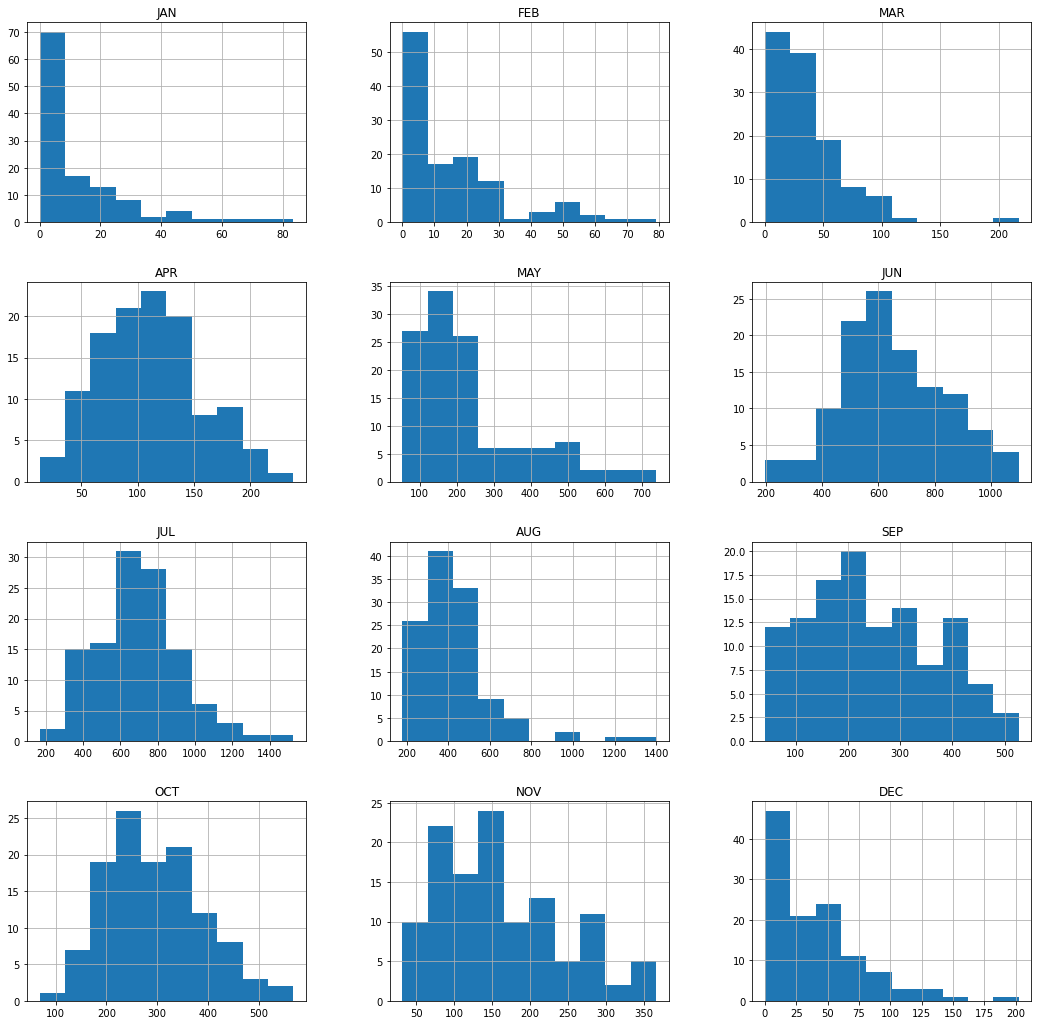

In [27]:
#Let's see hoe the rainfall index vary during rainy season
import matplotlib.pyplot as plt
%matplotlib inline
c = data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']]
c.hist(figsize=(18,18))


In [28]:
data['JAN'].fillna((data['JAN'].mean()), inplace=True)
data['FEB'].fillna((data['FEB'].mean()), inplace=True)
data['MAR'].fillna((data['MAR'].mean()), inplace=True)
data['APR'].fillna((data['APR'].mean()), inplace=True)
data['MAY'].fillna((data['MAY'].mean()), inplace=True)
data['JUN'].fillna((data['JUN'].mean()), inplace=True)
data['JUL'].fillna((data['JUL'].mean()), inplace=True)
data['AUG'].fillna((data['AUG'].mean()), inplace=True)
data['SEP'].fillna((data['SEP'].mean()), inplace=True)
data['OCT'].fillna((data['OCT'].mean()), inplace=True)
data['NOV'].fillna((data['NOV'].mean()), inplace=True)
data['DEC'].fillna((data['DEC'].mean()), inplace=True)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,118.0,1959.500000,34.207699,1901.0,1930.250,1959.50,1988.750,2018.0
JAN,118.0,12.218644,15.473766,0.0,2.175,5.80,18.175,83.5
FEB,118.0,15.633898,16.406290,0.0,4.700,8.35,21.400,79.0
MAR,118.0,36.670339,30.063862,0.1,18.100,28.40,49.825,217.2
APR,118.0,110.330508,44.633452,13.1,74.350,110.40,136.450,238.0
MAY,118.0,228.644915,147.548778,53.4,125.050,184.60,264.875,738.8
JUN,118.0,651.617797,186.181363,196.8,535.550,625.60,786.975,1098.2
JUL,118.0,698.220339,228.988966,167.5,533.200,691.65,832.425,1526.5
AUG,118.0,430.369492,181.980463,178.6,316.725,386.25,500.100,1398.9
SEP,118.0,246.207627,121.901131,41.3,155.425,223.55,334.500,526.7


In [29]:
#Data might be widely distributed so let's scale it between 0 and 1
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [30]:
#Let's divide the dataset into 2 sets:train and test in ratio (4:1)
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [31]:
#Let's see how our train set looks like
x_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
39,1940,0.6,1.5,3.8,126.5,217.4,606.4,877.3,610.8,68.2,257.7,287.5,60.1
30,1931,3.3,0.3,19.2,126.9,131.7,541.7,653.9,1199.2,163.2,149.3,164.3,106.5
67,1968,7.3,30.5,89.2,133.3,90.0,696.4,1308.9,380.7,325.4,178.9,119.4,32.7
65,1966,3.0,6.9,67.7,167.4,95.2,496.2,601.9,202.1,293.2,392.3,245.4,50.5
41,1942,2.4,4.7,23.2,180.3,191.9,813.6,828.8,329.3,99.8,374.4,84.7,117.9


In [32]:
y_train.head()

39    1
30    1
67    1
65    0
41    1
Name: FLOODS, dtype: int64

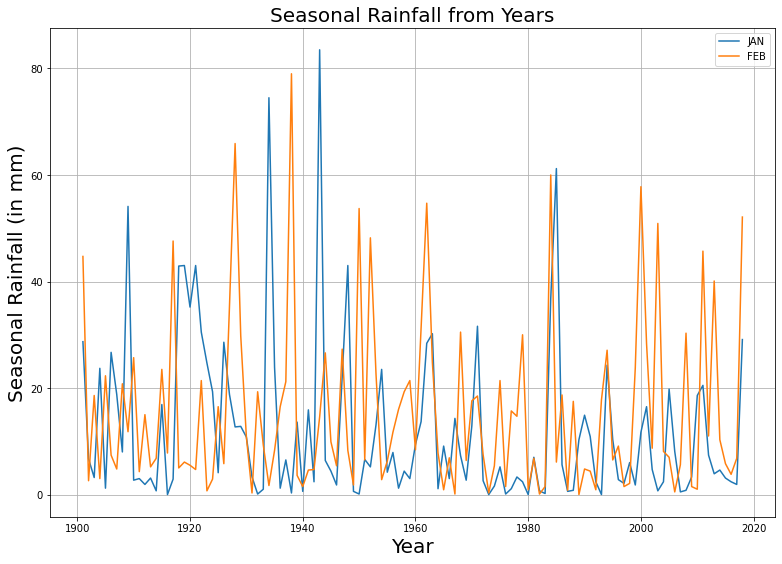

In [33]:
data[['YEAR','JAN', 'FEB',]].groupby("YEAR").mean().plot(figsize=(13,9));
plt.xlabel('Year',fontsize=20)
plt.ylabel('Seasonal Rainfall (in mm)',fontsize=20)
plt.title('Seasonal Rainfall from Years',fontsize=20)
#ax.tick_params(labelsize=30)
plt.grid()
plt.ioff()

<ipython-input-34-5237c5f29a47>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data[['YEAR','MAR', 'APR',]].groupby("YEAR").mean().plotcolor = ['red','orange'];


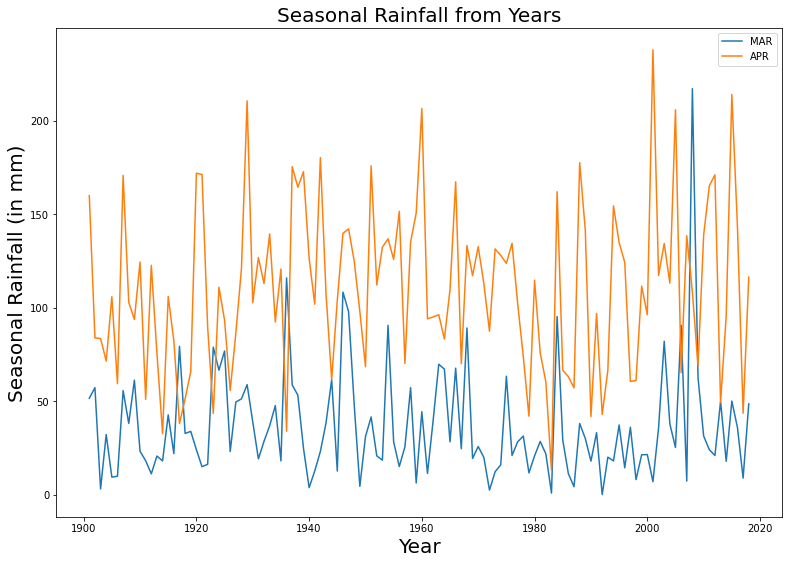

In [34]:
import matplotlib.colors
data[['YEAR','MAR', 'APR',]].groupby("YEAR").mean().plot(figsize=(13,9));
data[['YEAR','MAR', 'APR',]].groupby("YEAR").mean().plotcolor = ['red','orange'];
plt.xlabel('Year',fontsize=20)
plt.ylabel('Seasonal Rainfall (in mm)',fontsize=20)
plt.title('Seasonal Rainfall from Years',fontsize=20)
#ax.tick_params(labelsize=30)
plt.grid()
plt.grid(color=['red','orange'], linestyle='-.', linewidth=0.7)
plt.grid(color='w', linestyle='-', linewidth=2)
#plotcolor = ['red','orange']
plt.ioff()

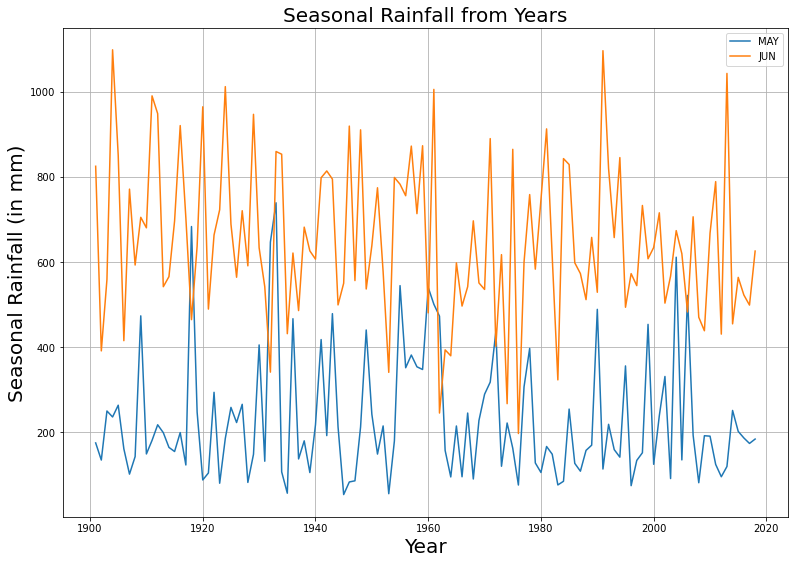

In [35]:
data[['YEAR','MAY', 'JUN',]].groupby("YEAR").mean().plot(figsize=(13,9));
plt.xlabel('Year',fontsize=20)
plt.ylabel('Seasonal Rainfall (in mm)',fontsize=20)
plt.title('Seasonal Rainfall from Years',fontsize=20)
#ax.tick_params(labelsize=30)
plt.grid()
plt.ioff()

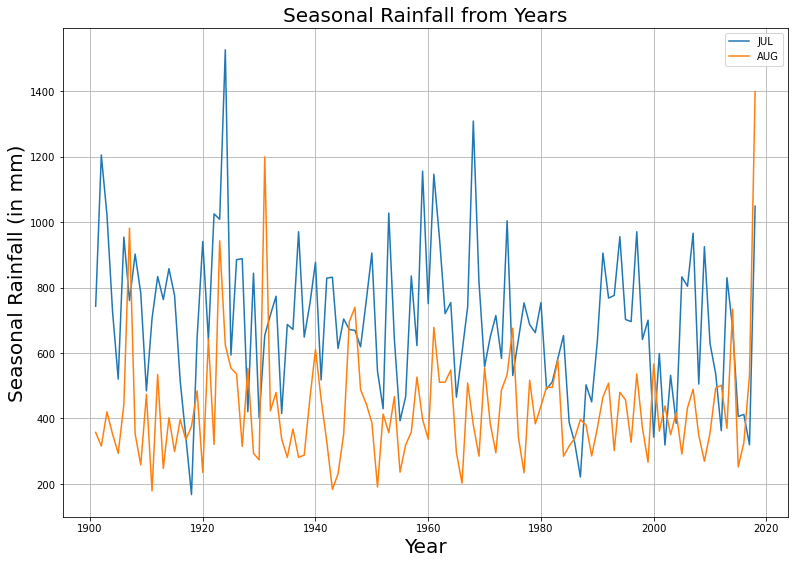

In [36]:
data[['YEAR','JUL', 'AUG',]].groupby("YEAR").mean().plot(figsize=(13,9));
plt.xlabel('Year',fontsize=20)
plt.ylabel('Seasonal Rainfall (in mm)',fontsize=20)
plt.title('Seasonal Rainfall from Years',fontsize=20)
#ax.tick_params(labelsize=30)
plt.grid()
plt.ioff()

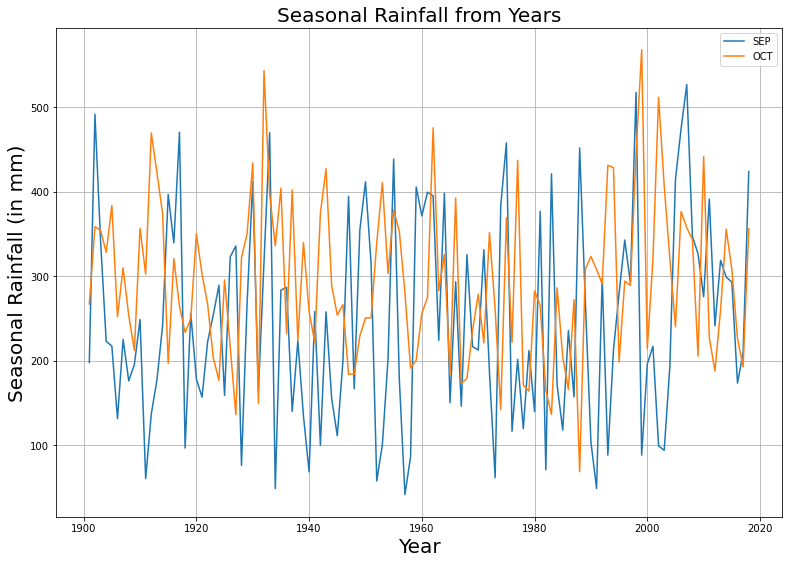

In [37]:
data[['YEAR','SEP', 'OCT',]].groupby("YEAR").mean().plot(figsize=(13,9));
plt.xlabel('Year',fontsize=20)
plt.ylabel('Seasonal Rainfall (in mm)',fontsize=20)
plt.title('Seasonal Rainfall from Years',fontsize=20)
#ax.tick_params(labelsize=30)
plt.grid()
plt.ioff()

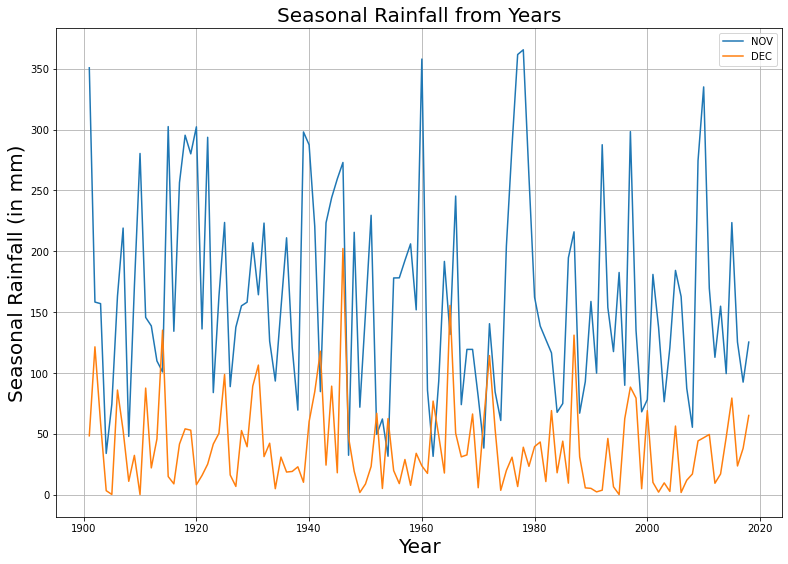

In [38]:
data[['YEAR','NOV', 'DEC',]].groupby("YEAR").mean().plot(figsize=(13,9));
plt.xlabel('Year',fontsize=20)
plt.ylabel('Seasonal Rainfall (in mm)',fontsize=20)
plt.title('Seasonal Rainfall from Years',fontsize=20)
#ax.tick_params(labelsize=30)
plt.grid()
plt.ioff()

# Prediction Algorithms:

# 1. KNN Classifier

In [39]:
clf = neighbors.KNeighborsClassifier()
knn_clf = clf.fit(x_train,y_train)

In [40]:
#Let's predict chances of flood
y_predict = knn_clf.predict(x_test)
print('predicted chances of flood')
print(y_predict)

predicted chances of flood
[0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0]


In [41]:
#Actual chances of flood
print("actual values of floods:")
print(y_test)

actual values of floods:
57     1
80     1
111    0
40     1
31     1
99     0
18     1
14     1
56     1
108    0
78     0
17     0
49     1
110    1
59     1
90     1
50     0
104    1
96     1
24     1
22     1
9      0
11     1
113    1
Name: FLOODS, dtype: int64


In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
knn_accuracy = cross_val_score(knn_clf,x_test,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [44]:
knn_accuracy.mean()

0.5416666666666666

# 2. Logistic Regression

In [45]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_clf = lr.fit(x_train_std,y_train)

lr_accuracy = cross_val_score(lr_clf,x_test_std,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [47]:
lr_accuracy.mean()

0.7083333333333334

In [48]:
y_predict = lr_clf.predict(x_test_std)
print('Predicted chances of flood')
print(y_predict)

Predicted chances of flood
[0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0]


In [49]:
print('Actual chances of flood')
print(y_test.values)

Actual chances of flood
[1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1]


In [50]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score: %f"%(accuracy_score(y_test,y_predict)*100))
print("recall score: %f"%(recall_score(y_test,y_predict)*100))
print("roc score: %f"%(roc_auc_score(y_test,y_predict)*100))


accuracy score: 75.000000
recall score: 76.470588
roc score: 73.949580


# 3. Decision tree classification

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc = cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.5625    , 0.70967742, 0.67741935])

In [52]:
#Predicted flood chances
y_pred = dtc_clf.predict(x_test)
print(y_pred)

[1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0]


In [53]:
#Actual flood chances
print("actual values:")
print(y_test.values)

actual values:
[1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1]


In [54]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))


accuracy score:75.000000
recall score:76.470588
roc score:73.949580


# 4. Random Forest Classification

In [55]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf = rmf.fit(x_train,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [56]:
rmf_clf_acc = cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
#rmf_proba = cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [57]:
rmf_clf_acc

array([0.65625   , 0.80645161, 0.80645161])

In [58]:
y_pred = rmf_clf.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))


accuracy score:75.000000
recall score:70.588235
roc score:78.151261


# 5. Enseble Learning

In [60]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
knn_clf = KNeighborsClassifier()

voting = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')

In [61]:
voting_clf = voting.fit(x_train, y_train)

In [62]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, knn_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9166666666666666
RandomForestClassifier 0.7083333333333334
KNeighborsClassifier 0.7916666666666666
VotingClassifier 0.9166666666666666


# Comparing all the prediction models

In [63]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('EL', VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')))


names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

C:\Users\91994\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Name     Score
0  KNN  0.791667
1   LR  0.916667
2   DT  0.708333
3   RF  0.791667
4   EL  0.916667


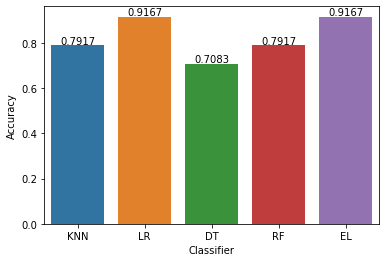

In [64]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()